# Question 2
1.   Full Name: Farhad Fallah 
2.   Student Number: 97102214

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import torch
import torch.nn as nn
from torch.utils.data import DataLoader ,Dataset 


## Part 1
### loading data

In [2]:
df = pd.read_csv('HW2_data\international_matches.csv')
df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


## Part 2
### plotting

<AxesSubplot:xlabel='home_team_fifa_rank', ylabel='away_team_fifa_rank'>

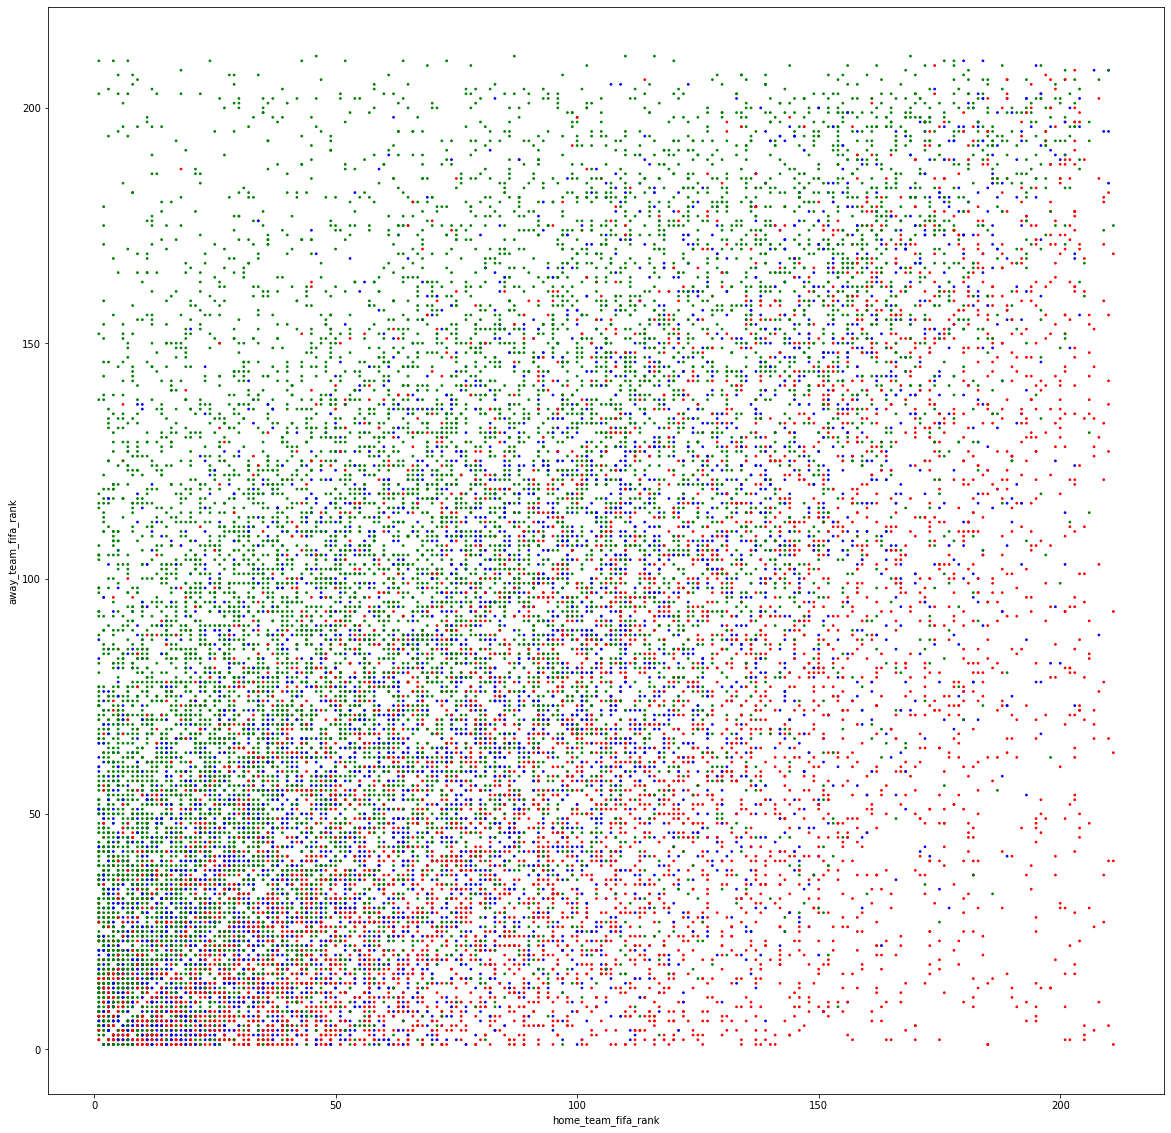

In [3]:
c = ['red','green' , 'blue']
color_map = dict()
color_map = {'Win':'green','Lose':'red' , 'Draw':'blue'}
labels = list(df['home_team_result'])
color = df.replace({"home_team_result": color_map})['home_team_result'].tolist()
df.plot.scatter(x = 'home_team_fifa_rank', y = 'away_team_fifa_rank', s = 3, figsize=(20,20) , c= color )


## Part 3
### Deleting 0points data

In [4]:
df = df[df['home_team_total_fifa_points'] !=0]
df = df[df['away_team_total_fifa_points'] !=0]
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
14250,2011-08-24,Guyana,India,South America,Asia,114,158,260,112,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14251,2011-08-24,Thailand,Singapore,Asia,Asia,120,129,245,208,0,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14252,2011-08-25,United Arab Emirates,Qatar,Asia,Asia,108,88,298,364,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14253,2011-08-26,Bahrain,Sudan,Asia,Africa,101,98,325,328,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14254,2011-08-27,Angola,Congo DR,Africa,Africa,96,127,338,221,1,...,No,Lose,70.0,NaN,NaN,69.7,61.5,69.2,69.7,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


## Part 4
### Plotting Heatmap

9594

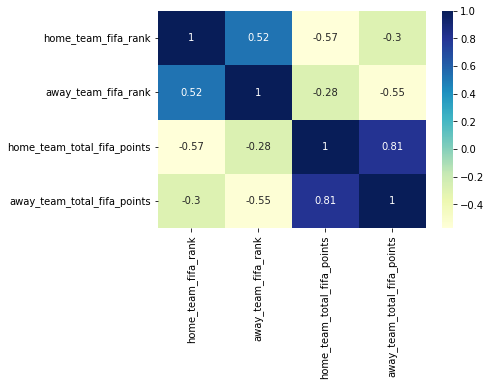

In [5]:
newdf =  df[['home_team_fifa_rank' , 'away_team_fifa_rank' , 'home_team_total_fifa_points' , 'away_team_total_fifa_points']]

sb.heatmap(newdf.corr(), cmap="YlGnBu", annot=True)
len(df)

In [6]:
training_rate = 0.75
n = len(df)
labels_map = {
    "Win" : 0 ,
    "Lose" : 1 ,
    "Draw": 2 ,
}
df = df.replace({"home_team_result": labels_map})
df = df[['home_team_fifa_rank' , 'away_team_fifa_rank' , 'home_team_total_fifa_points' , 'away_team_total_fifa_points', 'home_team_result']]
data_train = df[0:int(n*training_rate)]
data_test = df[int(n*training_rate)::]
print(data_train.shape)
print(data_test.shape)
df


(7195, 5)
(2399, 5)


,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_result
14250,114,158,260,112,0
14251,120,129,245,208,2
14252,108,88,298,364,0
14253,101,98,325,328,0
14254,96,127,338,221,1
...,...,...,...,...,...
23916,180,153,932,1040,0
23917,192,135,895,1105,1
23918,28,60,1526,1387,1
23919,23,35,1553,1499,1


In [7]:
class CustomDataset(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        #df = pd.read_csv(annotations_file)
        self.labels = torch.tensor(df['home_team_result'].to_numpy())
        df =  df[['home_team_fifa_rank' , 'away_team_fifa_rank' , 'home_team_total_fifa_points' , 'away_team_total_fifa_points']]
        self.features = torch.tensor(df.to_numpy())
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        #img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        feature = self.features[idx,:]
        label = self.labels[idx]
        if self.transform:
            feature = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return feature, label

In [8]:
train_data = CustomDataset(data_train)
test_data = CustomDataset(data_test)

print(len(train_data),len(test_data))

7195 2399


In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## Part 5
### neural network Architecture

In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8, 3),
            #nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        #y_pred = logits.argmax(dim=1)
        return logits

In [11]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=3, bias=True)
  )
)


## Part 6
### model training and test

In [12]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        #print(y.shape)
        X = X.float()
        pred = model(X)
        
        #print(pred)
        #print(type(y))
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 50 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.float()
            pred = model(X)
            
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [34]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
batch_size = 64
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")
torch.save(model, 'model.pth')


Epoch 1
-------------------------------
loss: 0.952639  [    0/ 7195]
loss: 0.822123  [ 3200/ 7195]
loss: 0.942186  [ 6400/ 7195]
Test Error: 
 Accuracy: 56.7%, Avg loss: 0.934426 

Epoch 2
-------------------------------
loss: 0.907614  [    0/ 7195]
loss: 0.887645  [ 3200/ 7195]
loss: 0.812485  [ 6400/ 7195]
Test Error: 
 Accuracy: 58.4%, Avg loss: 0.920494 

Epoch 3
-------------------------------
loss: 0.844504  [    0/ 7195]
loss: 0.936025  [ 3200/ 7195]
loss: 0.968310  [ 6400/ 7195]
Test Error: 
 Accuracy: 58.3%, Avg loss: 0.910697 

Epoch 4
-------------------------------
loss: 0.897018  [    0/ 7195]
loss: 0.884240  [ 3200/ 7195]
loss: 0.944402  [ 6400/ 7195]
Test Error: 
 Accuracy: 59.4%, Avg loss: 0.900453 

Epoch 5
-------------------------------
loss: 0.927166  [    0/ 7195]
loss: 0.978772  [ 3200/ 7195]
loss: 0.891240  [ 6400/ 7195]
Test Error: 
 Accuracy: 61.3%, Avg loss: 0.889472 

Epoch 6
-------------------------------
loss: 0.937044  [    0/ 7195]
loss: 0.917354  [ 32

## Part 7
### final results for iran's matches

In [35]:
# loading
model = torch.load('model.pth')

In [36]:
test = torch.tensor(([20,5,1564,1728],[20,19,1564,1569],[20,16,1564,1627]))
test
X = test.float()
logits = model(X).argmax(1)
labels_map = {
      0 : "Win",
      1 : "Lose" ,
    2:"Draw" ,
}
for result in logits:
    print (labels_map[int(result)])

Lose
Lose
Lose
